# Introduction

Within the dynamic realm of data science and artificial intelligence, garnering a deep comprehension of the inherent statistical structures and scaling laws prevalent in datasets is of utmost significance for the effective training and optimization of models. My endeavor aims to replicate, substantiate, and potentially enrich the insights originally unveiled by Levi and Oz, as well as Maloney, Roberts, and Sully, leveraging the iconic MNIST dataset. By concentrating on this singular dataset, I aim to underscore the potential universality and domain-transcending nature of the aforementioned findings, all while accommodating my computational boundaries. This exploration aspires to highlight the interplay between data and its inherent scaling relationships, ultimately enhancing our understanding and application of machine learning models on real-world challenges.

# EDA

In pursuit of replicating and validating the pivotal findings from both Levi and Oz's exploration on the universal statistical structure of datasets and the neural scaling laws presented by Maloney, Roberts, and Sully, I have opted to utilize the MNIST dataset. Renowned for its widespread use in the domain of Image Classification and Computer Vision, the MNIST dataset, composed of handwritten digits, offers an optimal blend of complexity and manageability. This dataset is emblematic of foundational challenges in machine learning, while its moderate size ensures that computational constraints, such as those presented by my laptop, are respected. By focusing on MNIST, I intend to navigate the balance between obtaining meaningful insights and ensuring a smooth, feasible computational experience.

In [33]:
# %pip install scikit-learn
# %pip install pandas
# %pip install numpy 
# %pip install tensorflow 
# %pip install nltk
# %pip install matplotlib
# %pip install seaborn

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tensorflow as tf
nltk.download('punkt')
%matplotlib inline
sns.set(color_codes=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
# Download the MNIST dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist["data"], mnist["target"] # X is the image data, y are the labels


In [37]:
X.shape

(70000, 784)

In [38]:
# Convert data to a NumPy array before performing any operations on it

X = np.array(X)
y = np.array(y)

In [39]:
# Reshape the dataset
X_reshaped = X.reshape(-1, 28, 28)

In [40]:
# Rescale the dataset
X_rescaled = X_reshaped / 255.0

We display the first few images of the MNISt dataset.

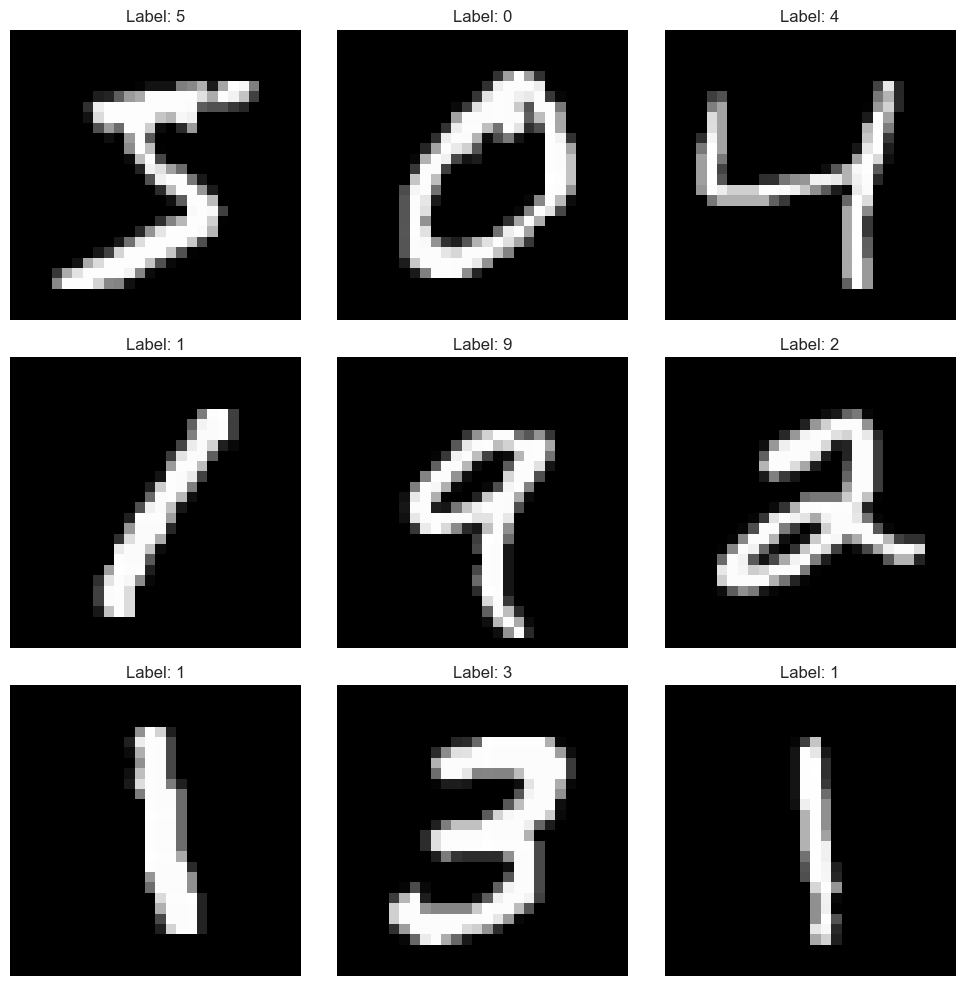

In [41]:
# Display first few images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_rescaled[i], cmap=plt.get_cmap('gray'))
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout(pad=1.0)
plt.show()

We continue our data exploration, by looking at the class distribution of our dataset. We are interested to know how many samples of each lable are present in the dataset.

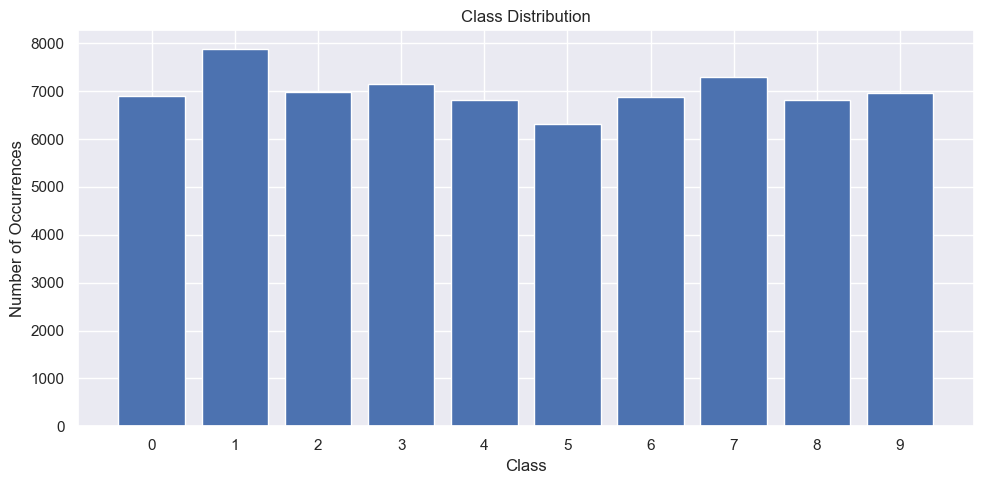

In [42]:
# Class distribution
plt.figure(figsize=(10, 5))  # Adjusting figure size for better visualization
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Occurrences')
plt.xticks(list(unique))
plt.tight_layout()
plt.show()

We now represent the distribution of picel intensities in a single randomly chosen image of the MNIST dataset.

The image data in MNIST consists of grayscale pixel values ranging from 0 (black) to 255 (white). This histogram allows us to see the frequency of each pixel intensity in the image.

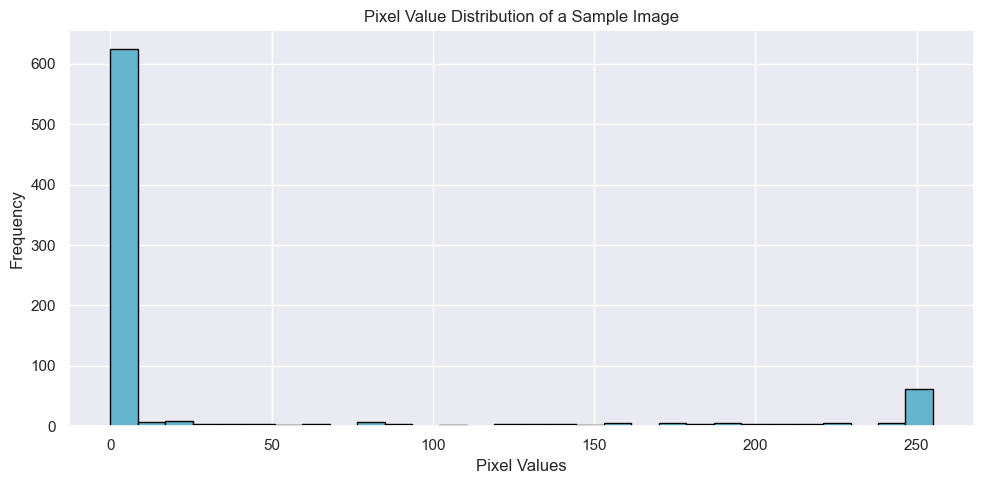

In [43]:
# Pixel value distribution for a random image
plt.figure(figsize=(10, 5))
plt.hist(X[0], bins=30, color='c', edgecolor='black')
plt.title('Pixel Value Distribution of a Sample Image')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

As expected, there are many black pixels in our images. Let us depict the histogram again, this time without taking into account black pixels.

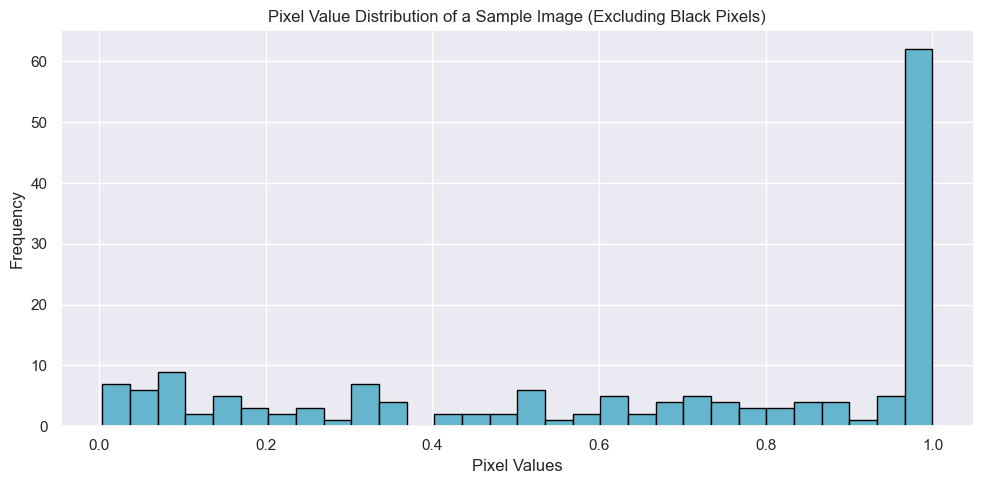

In [44]:
# Filter out the black pixels from the chosen image
non_black_pixels = X_rescaled[0][X_rescaled[0] > 0]

# Create the histogram for non-black pixel values
plt.figure(figsize=(10, 5))
plt.hist(non_black_pixels, bins=30, color='c', edgecolor='black')
plt.title('Pixel Value Distribution of a Sample Image (Excluding Black Pixels)')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

It might be interesting to visualize the average image for each label of each class, in order to gain insights into the common patterns of each digit.

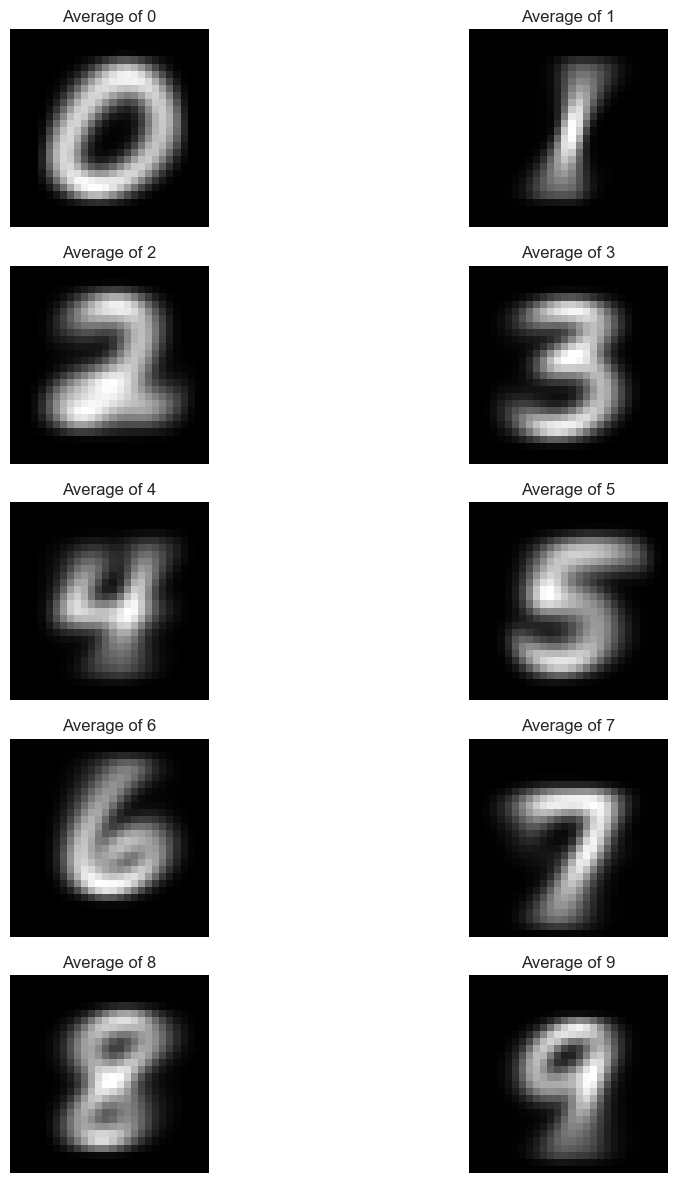

In [45]:
unique_classes = np.unique(y)

plt.figure(figsize=(12, 12))
for idx, label in enumerate(unique_classes):
    plt.subplot(5, 2, idx+1)
    avg_image = np.mean(X_rescaled[y == label], axis=0)
    plt.imshow(avg_image.reshape(28, 28), cmap='gray')
    plt.title(f"Average of {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

It might also be interesting to measure the variance of each class. This allows us to get a clear view on how the images of each class vary around the mean image.

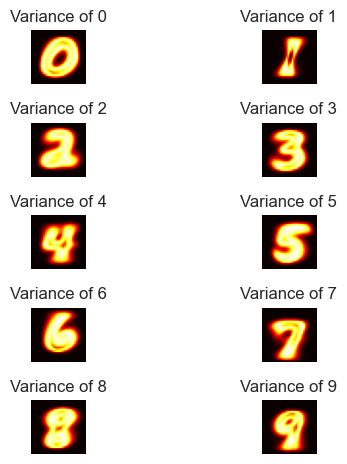

In [46]:
for idx, label in enumerate(unique_classes):
    subset = X_rescaled[y == label]
    plt.subplot(5, 2, idx+1)
    var_image = np.var(subset, axis=0)
    plt.imshow(var_image.reshape(28, 28), cmap='hot')
    plt.title(f"Variance of {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Here, bright pixels indicate areas of high variance. In the context of the MNIST dataset, a bright pixel in this visualization for a specific digit indicates that, across all the images of that digit in the dataset, the intensity of that pixel location varies considerably.

Let's get an overview of the intensity distribution over the entire dataset with the aid of a pixel intensity heatmap.

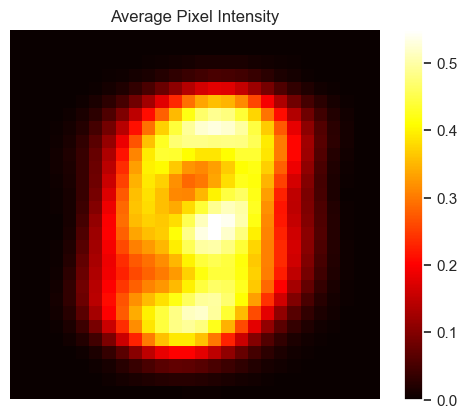

In [47]:
avg_intensity = np.mean(X_rescaled, axis=0)
plt.imshow(avg_intensity.reshape(28, 28), cmap='hot', interpolation='nearest')
plt.title("Average Pixel Intensity")
plt.colorbar()
plt.axis('off')
plt.show()

By computing a Principal Component Analysis on our dataset we can understand how different digit classes are distributed in a reduced-dimensional space. We are interested to find out if some digits are more distinctly separable from others than other digits.

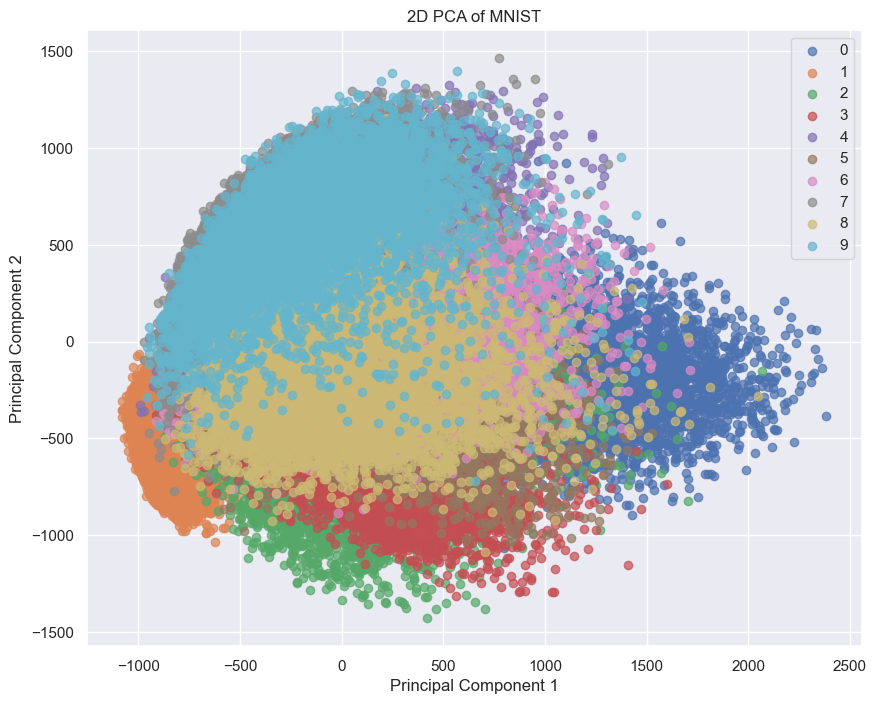

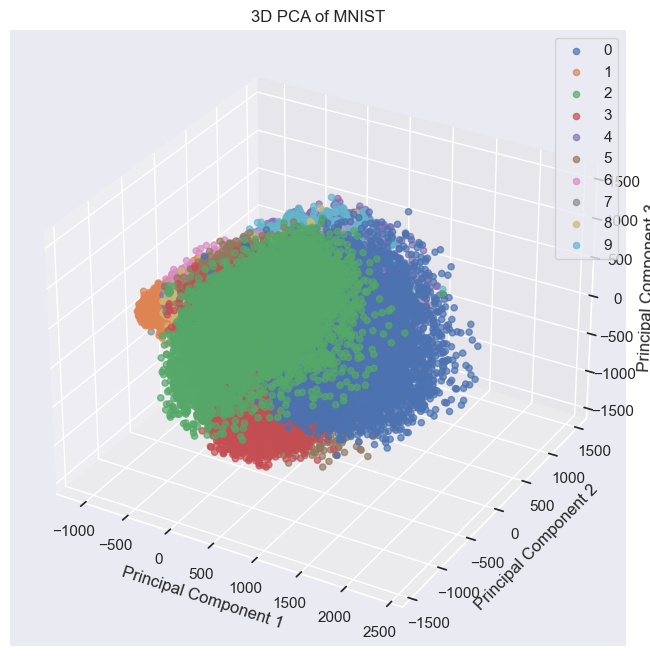

In [48]:
from sklearn.decomposition import PCA

# 2D PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
for label in unique_classes:
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=str(label), alpha=0.7)
plt.title("2D PCA of MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

#3D PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_classes = np.unique(y)
for label in unique_classes:
    ax.scatter(X_pca[y == label, 0], X_pca[y == label, 1], X_pca[y == label, 2], label=str(label), alpha=0.7)

ax.set_title("3D PCA of MNIST")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.show()

We observe that images of the same label have similar dominant features, and the classes are quite distinguishable, even in the reduced space.

We proceed by visualizing the distribution of average pixel intensities for each class.

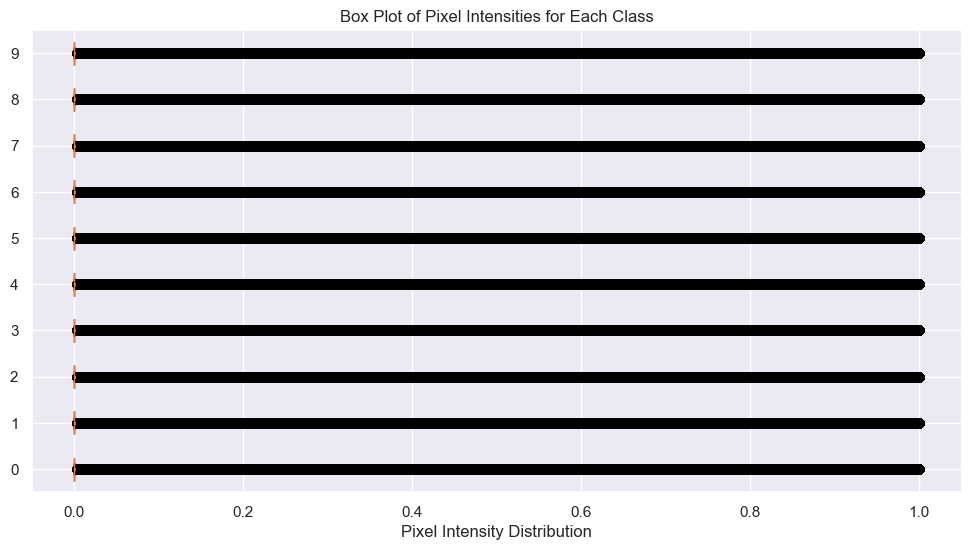

In [49]:
# Collect pixel intensities by class
intensities_by_class = [X_rescaled[y == label].ravel() for label in unique_classes]

plt.figure(figsize=(12, 6))
plt.boxplot(intensities_by_class, vert=False, patch_artist=True)
plt.yticks(range(1, len(unique_classes) + 1), unique_classes)
plt.xlabel('Pixel Intensity Distribution')
plt.title('Box Plot of Pixel Intensities for Each Class')
plt.show()

Of course, this gives very little insight because the interquartile range spans from pixel intensity 0 to 255. Let's repeat the graph excluding these two values.

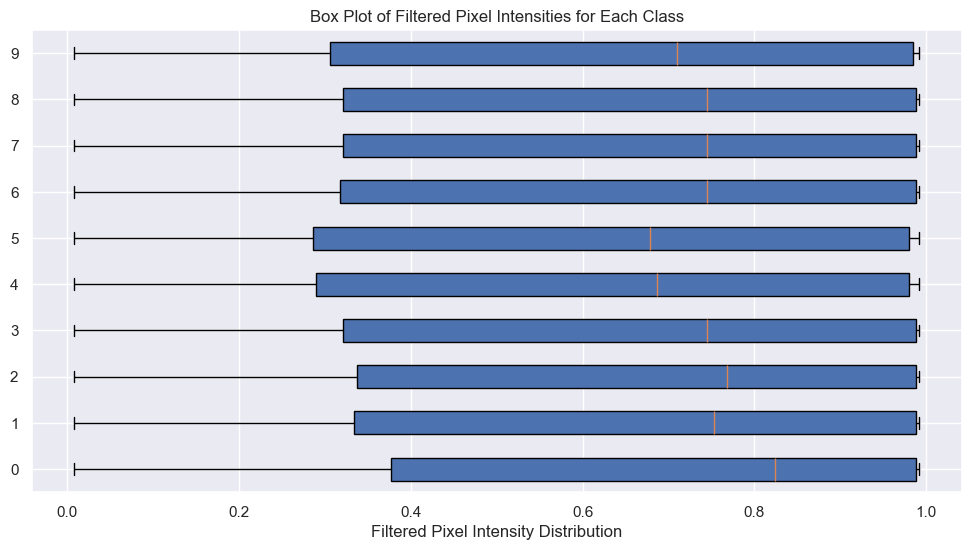

In [50]:
# Define thresholds to filter out extreme black and white pixels
lower_threshold = 1/255
upper_threshold = 254/255

# Filter pixel intensities for each class
filtered_intensities_by_class = [X_rescaled[(y == label)].ravel() for label in unique_classes]

# Filter out values that are close to 0 or 255
filtered_intensities_by_class = [intensities[(intensities > lower_threshold) & (intensities < upper_threshold)] for intensities in filtered_intensities_by_class]

plt.figure(figsize=(12, 6))
plt.boxplot(filtered_intensities_by_class, vert=False, patch_artist=True)
plt.yticks(range(1, len(unique_classes) + 1), unique_classes)
plt.xlabel('Filtered Pixel Intensity Distribution')
plt.title('Box Plot of Filtered Pixel Intensities for Each Class')
plt.show()

# Scaling Laws and Eigenvalue Analysis

## Real-world data: MNIST

Let us investigate the eigenvalue statistics of the feature-feature covariance matrix of the MNIST dataset, focusing on power-law scaling.

In [51]:
# Center and normalize the data
X_centered = X - X.mean(axis=0)
#X_standardized = X_centered / (X.std(axis=0) + 1e-10)

# Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)  # we treat columns as features

In [20]:
# Compute egienvalues

eigenvalues, _ = np.linalg.eigh(cov_matrix)
eigenvalues = np.flip(eigenvalues)

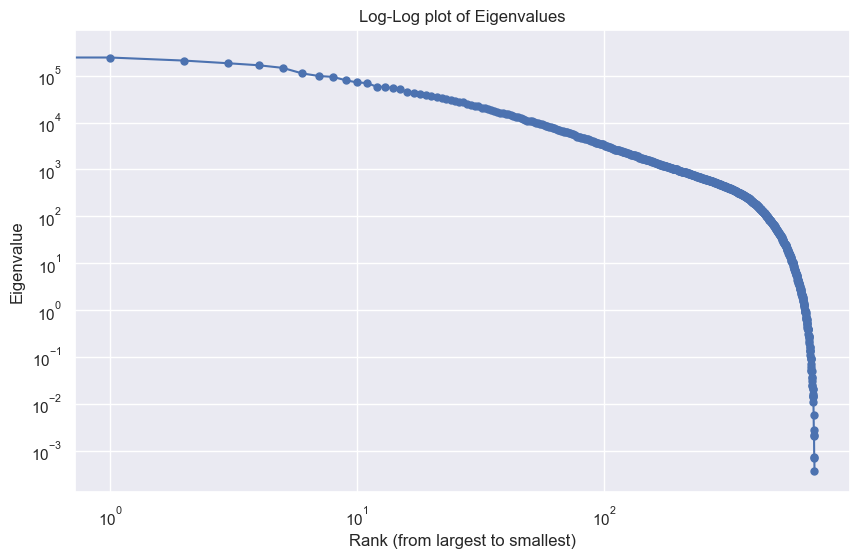

In [21]:
# Analyze eigenvalue distribution

filtered_eigenvalues = eigenvalues[eigenvalues > 1e-8]
plt.figure(figsize=(10, 6))
plt.loglog(filtered_eigenvalues, 'o-', markersize=5)
plt.title('Log-Log plot of Eigenvalues')
plt.xlabel('Rank (from largest to smallest)')
plt.ylabel('Eigenvalue')
plt.show()

Let us compare this graph to different scaling functions of the form λ$_i \propto i^{-1-\alpha}$, $\alpha \in \mathbb{R}$, where i represents the rank.

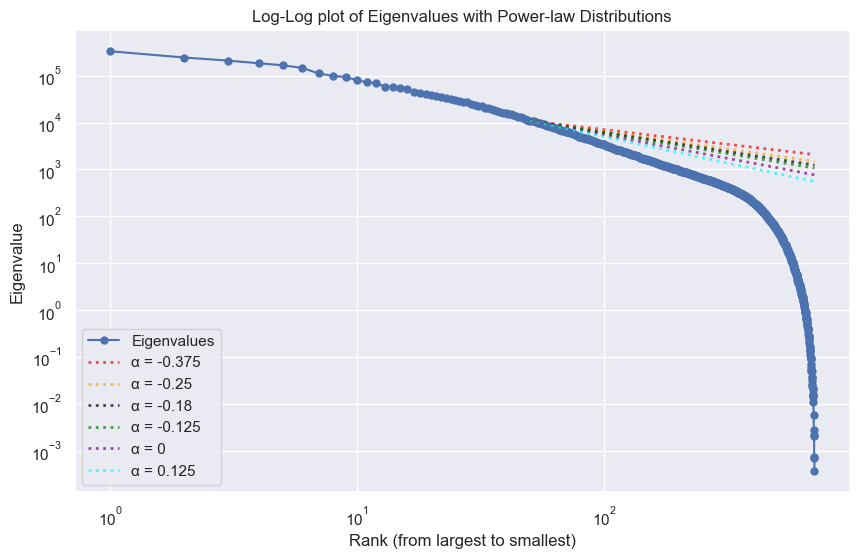

In [22]:

# Generate ranks for power-law
ranks = np.arange(1, len(filtered_eigenvalues) + 1, dtype=float)

plt.figure(figsize=(10, 6))

# Plot the eigenvalues
plt.loglog(ranks, filtered_eigenvalues, 'o-', markersize=5, label='Eigenvalues')

# List of alphas to plot, and their corresponding colors for visualization
alphas = [-0.375, -0.25, -0.18, -0.125, 0, 0.125]
colors = ['red', 'orange', 'black', 'green', 'purple', 'cyan']

# The starting rank and corresponding eigenvalue for the power-law curves
start_rank = 50
start_eigenvalue = filtered_eigenvalues[start_rank - 1]  # -1 because index starts at 0

# Plot the power-law curves starting from the fifth dot
for alpha, color in zip(alphas, colors):
    plt.loglog(ranks[start_rank - 1:], (ranks[start_rank - 1:] / start_rank)**(-1 - alpha) * start_eigenvalue, label=f'α = {alpha}', color=color, lw=2, alpha=0.7, linestyle=':')

# Labels, legend, and show
plt.xlabel('Rank (from largest to smallest)')
plt.ylabel('Eigenvalue')
plt.title('Log-Log plot of Eigenvalues with Power-law Distributions')
plt.legend()
plt.show()

In order to follow Levi's and Oz's paper, we must compute the dimensionality of the "bulk" of the eigenvalue spectrum of the dataset.

We determine the point where there's a noticeable change in the decay rate of the eigenvalues on a log-log plot.

In [23]:
def find_bulk_dimension(ranks, eigenvalues, window_size=550):
    log_ranks = np.log(ranks)
    log_eigenvalues = np.log(eigenvalues)

    # Calculate slopes using the window
    slopes = [np.polyfit(log_ranks[i:i+window_size], log_eigenvalues[i:i+window_size], 1)[0] for i in range(len(log_ranks) - window_size)]

    # Detect the change in slopes
    slope_changes = np.diff(slopes)

    # Look for the most negative change (indicating a transition from a smaller negative slope to a larger negative slope)
    d_bulk = np.argmin(slope_changes)

    return d_bulk + window_size // 2  # Adjusting for window

d_bulk_estimate = find_bulk_dimension(ranks, eigenvalues)
print(f"Estimated d_bulk: {d_bulk_estimate}")

Estimated d_bulk: 436


C:\Users\diego\AppData\Local\Temp\ipykernel_6640\1901053183.py:3: RuntimeWarning: divide by zero encountered in log
  log_eigenvalues = np.log(eigenvalues)
C:\Users\diego\AppData\Local\Temp\ipykernel_6640\1901053183.py:3: RuntimeWarning: invalid value encountered in log
  log_eigenvalues = np.log(eigenvalues)


We now represent the previous graphs but drawing the power-law lines only up to the rank corresponding to the bulk dimensionality.

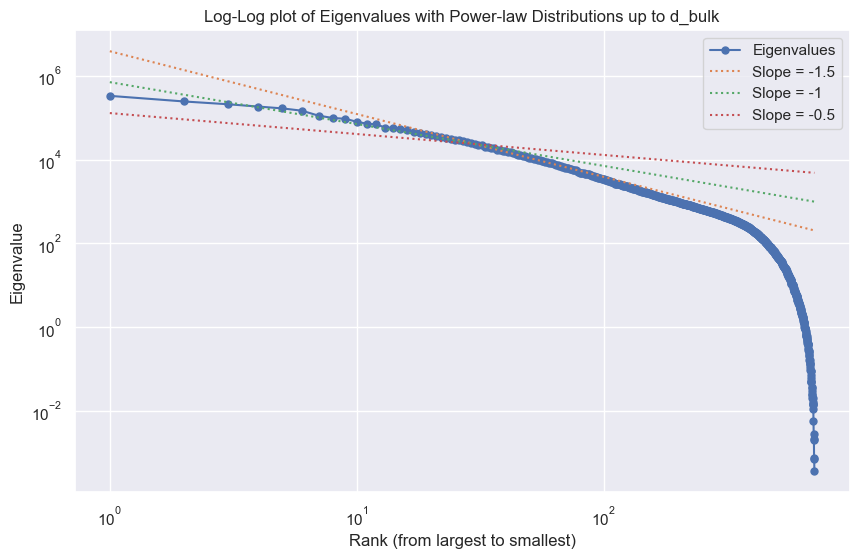

In [24]:
# the scaling law begins around the 10-th eigenvalue
start_index = 30
start_eigenvalue = filtered_eigenvalues[start_index-1]

# Generate ranks for power-law
ranks = np.arange(1, len(filtered_eigenvalues) + 1, dtype=float)
d_bulk_rank = min(d_bulk_estimate, len(ranks))  # Ensure the rank is within bounds

# Truncate the ranks for plotting truncated lines
truncated_ranks = ranks[start_index-1:d_bulk_rank]
truncated_eigenvalues = filtered_eigenvalues[start_index-1:d_bulk_rank]

# Start plotting
plt.figure(figsize=(10, 6))

# First, plot the full eigenvalues curve
plt.loglog(ranks, filtered_eigenvalues, 'o-', markersize=5, label='Eigenvalues')

# List of alphas to plot, and their corresponding colors for visualization
slopes = [-1.5, -1, -0.5]
colors = ['red', 'orange', 'purple']

# Then, plot the power-law curves on top of the eigenvalues, but only up to d_bulk
for slope, color in zip(slopes, colors):
    y_intercept = start_eigenvalue / (start_index**slope)
    x_values = np.linspace(1, len(filtered_eigenvalues), 10000) 
    y_values = y_intercept * x_values**slope
    plt.loglog(x_values, y_values, label=f'Slope = {slope}', linestyle = ':')


# Labels, grid, and show
plt.xlabel('Rank (from largest to smallest)')
plt.ylabel('Eigenvalue')
plt.title('Log-Log plot of Eigenvalues with Power-law Distributions up to d_bulk')
plt.legend()
plt.show()

We find the alpha that best approximates the trend of the log-log graph corresponding to the eignevalue bulk. We do so by performing the MSE between the observed eigenvalues and those predicted by a power-law function for a range of $\alpha$.

In [25]:
import numpy as np
from scipy.optimize import curve_fit

# Define the power-law function to fit
def power_law(i, m, alpha):
    return m * i**(-1 - alpha)

# Get the bulk ranks and corresponding eigenvalues
bulk_ranks = ranks[start_index:d_bulk_rank]
bulk_eigenvalues = filtered_eigenvalues[start_index:d_bulk_rank]

# Perform the curve fitting to find the best alpha
params, params_covariance = curve_fit(power_law, bulk_ranks, bulk_eigenvalues)

# Extract the best fitting alpha
C_fit, alpha_fit = params

# Print the best fitting alpha
print("Best fitting alpha:", alpha_fit)

Best fitting alpha: 0.6601508704871053


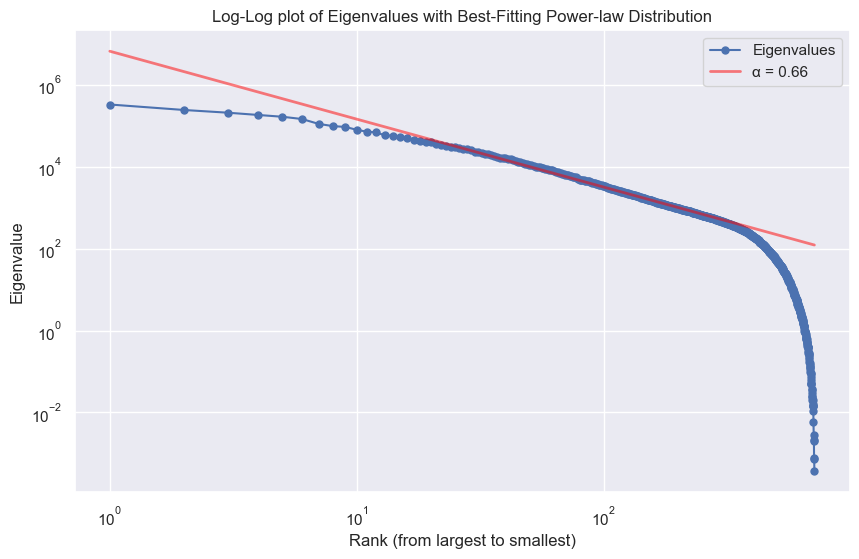

In [26]:
# Assume alpha_fit is the best fitting alpha that you have already calculated
# And eigenvalues is the array of eigenvalues you have computed

# Define the ranks for plotting
ranks = np.arange(1, len(filtered_eigenvalues) + 1, dtype=float)

# Calculate the constant m using the tenth eigenvalue and the best fitting alpha
m = start_eigenvalue * start_index**(1 + alpha_fit)

# Now plot the full eigenvalues curve
plt.figure(figsize=(10, 6))
plt.loglog(ranks, filtered_eigenvalues, 'o-', markersize=5, label='Eigenvalues')

# Plot the power-law curve defined by the estimated alpha on top of the eigenvalues
# Here we use the calculated constant m so the curve passes through the 10th eigenvalue
plt.loglog(ranks, m * ranks**(-1 - alpha_fit), label=f'α = {alpha_fit:.2f}', color='red', lw=2, alpha=0.5)

# Set labels, title, and grid
plt.xlabel('Rank (from largest to smallest)')
plt.ylabel('Eigenvalue')
plt.title('Log-Log plot of Eigenvalues with Best-Fitting Power-law Distribution')
plt.legend()
plt.show()


Let us now build log-log plots of the MNIST spectra for different dataset sizes, to compare their shapes. 

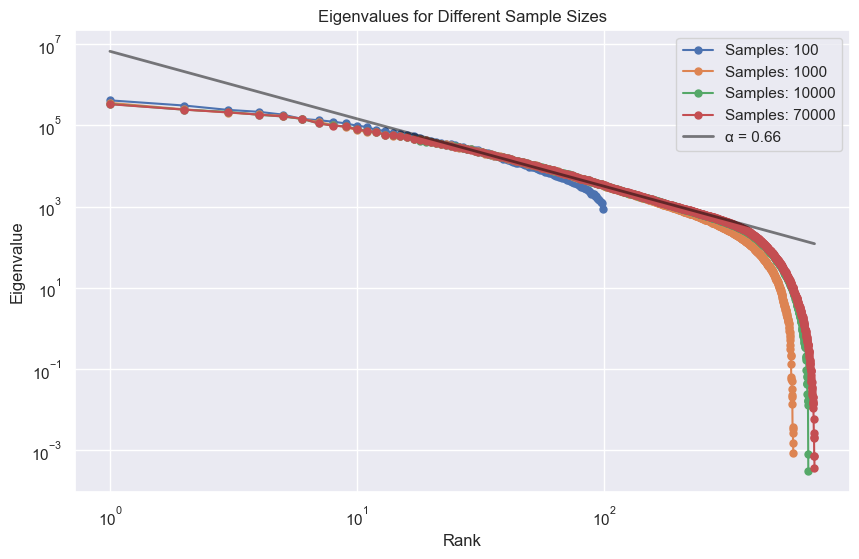

In [27]:
def plot_eigenvalues_for_different_sample_sizes(X, sample_sizes):
    plt.figure(figsize=(10, 6))
    for size in sample_sizes:
        X_subset = X[np.random.choice(X.shape[0], size, replace=False), :]
        cov_matrix = np.cov(X_subset, rowvar=False)
        eigenvalues = np.linalg.eigvalsh(cov_matrix)
        eigenvalues = np.flip(eigenvalues)
        filtered_eigenvalues = eigenvalues[eigenvalues > 1e-4]
        plt.loglog(np.arange(1, len(filtered_eigenvalues) + 1), filtered_eigenvalues, 'o-', markersize=5, label=f'Samples: {size}')
    plt.loglog(ranks, m * ranks**(-1 - alpha_fit), label=f'α = {alpha_fit:.2f}', color='black', lw=2, alpha=0.5)
    plt.xlabel('Rank')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues for Different Sample Sizes')
    plt.legend()
    plt.show()

sample_sizes = [100, 1000, 10000, len(X)]

plot_eigenvalues_for_different_sample_sizes(X_centered, sample_sizes)

We find out that if we increase the size of the dataset, we increase the size of the portion of the spectrum that participates in the power law. 

Let us now build log-log plots of the MNIST spectra for different feature subset sizes, to compare their shapes. 

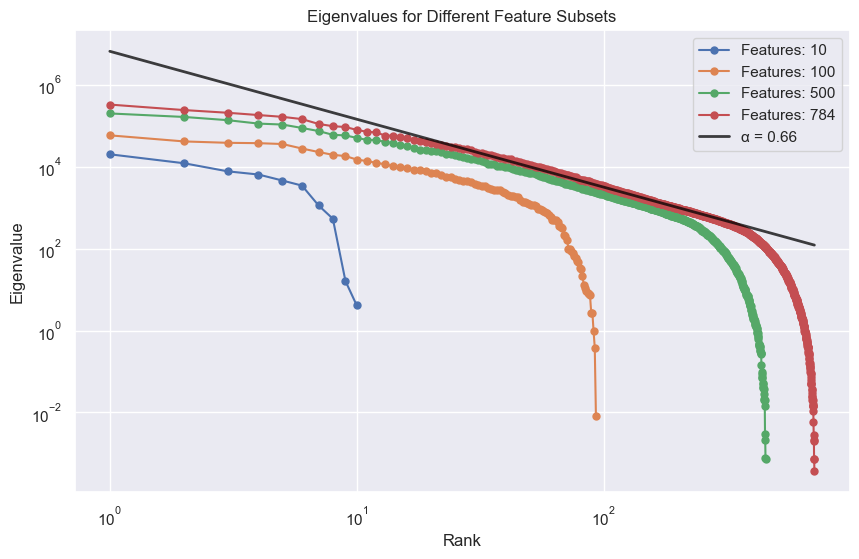

In [28]:
def plot_eigenvalues_for_different_feature_subsets(X, feature_subset_sizes):
    plt.figure(figsize=(10, 6))
    for num_features in feature_subset_sizes:
        indices = np.random.choice(X.shape[1], num_features, replace=False)
        X_subset = X[:, indices]
        cov_matrix = np.cov(X_subset, rowvar=False)
        eigenvalues = np.linalg.eigvalsh(cov_matrix)
        eigenvalues = np.flip(eigenvalues)
        filtered_eigenvalues = eigenvalues[eigenvalues > 1e-4]
        plt.loglog(np.arange(1, len(filtered_eigenvalues) + 1),  filtered_eigenvalues, 'o-', markersize=5, label=f'Features: {num_features}')
    plt.loglog(ranks, m * ranks**(-1 - alpha_fit), label=f'α = {alpha_fit:.2f}', color='black', lw=2, alpha=0.75)
    plt.xlabel('Rank')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues for Different Feature Subsets')
    plt.legend()
    plt.show()

feature_subset_sizes = [10, 100, 500, 784]

plot_eigenvalues_for_different_feature_subsets(X_centered,feature_subset_sizes)

We find out that if we subsample the input features for a given dataset sample size, the increasing number of subsample features extend the power law, preserving the spectrum's structure.

To sum up, by increasing the number of samples or features, we can extend the spectral power law, which can turn useful in various situations (see PCA example at page 10, Maloney et al.).

Therefore we might ask the following question: if we further extended the size of the input features would we acquire an even larger portion of the spectrum satisfying the power law?

## Feature Map Properties

To answer the previous question, we could try mapping the input data to a feature space, $N$ that is larger than the input space $N_{in}$. We define a collection of feature functions as follows: $\phi_j(x)$, with $j = 1,...,N$, where $j$ indexes the different features of the representation of the input $x$. We are interested in studying the spectrum of this representation, which we can find by forming the empirical feature-feature covariance matrix of features, $\frac{1}{T}\sum_{\alpha=1}^{T}\phi_{i;\alpha}\phi_{j;\alpha}$, where $T$ is the dataset sample size, and then computing its eigenvalues $\lambda_j$. As a first feature map, let's pass our input dataset through a linear transformation: $\phi_{j_\alpha} = \sum_{k = 1}^{N_{in}}w_{jk}x_{k;\alpha}$, where $w_{jk}$ is a $N$-by-$N_{in}$-dimensional weight matrix, which we assume to be full rank. We can assume each component of the weight matric to be sampled independently from a zero-mean Gaussian distribution with variance $\frac{1}{N_{in}}$.

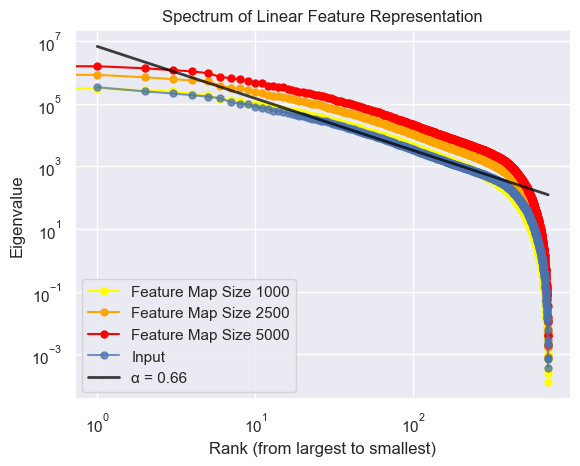

In [29]:
N_in = X_centered.shape[1]

# Try different weight marix sizes
sizes = [1000, 2500, 5000]

# Build the weight matrix
def weight_matrix(N):
    W = np.random.normal(0,1/np.sqrt(N_in), size = (N,N_in))
    return(W)

colors = ['yellow', 'orange', 'red']

# Plot the weight matrices' spectra
for size, color in zip(sizes,colors):
    phi = X_centered @ weight_matrix(size).T
    cov_matrix_features = np.cov(phi, rowvar = False)
    eigenvalues_features = np.linalg.eigh(cov_matrix_features)[0]
    eigenvalues_features = np.flip(eigenvalues_features)
    filtered_eigenvalues_features = eigenvalues_features[eigenvalues_features > 1e-4]
    plt.loglog(filtered_eigenvalues_features, 'o-', markersize=5, color=color, label=f'Feature Map Size {size}')

plt.loglog(ranks, filtered_eigenvalues, 'o-', markersize=5, label='Input', alpha = 0.75)
plt.loglog(ranks, m * ranks**(-1 - alpha_fit), label=f'α = {alpha_fit:.2f}', color='black', lw=2, alpha=0.75)

plt.xlabel('Rank (from largest to smallest)')
plt.ylabel('Eigenvalue')
plt.title('Spectrum of Linear Feature Representation')
plt.legend()
plt.show()  

This doesn't work properly: a linear map to the larger space can only create linearly-dependent columns, and thus can only add zero eigenvalues to the spectrum. So, to meaningfully extend our spectrum, we must need to apply some nonlinear function. 

Let's apply a nonlinear activation function following the linear transformation: $\phi_{j;\alpha}=\sigma(\sum_{k=1}^{N_{in}}w_{jk}x_{k;\alpha})$, where $\sigma$ is a scalar function that acts on each individual component $x_k$ of an input data point. Let us set $\sigma$ to be defined by $\sigma(z)= z \cdot \mathbb{I}_{z>0}$. Again, we will take each $w_{jk}$ to be independent and initialized identically according to a zero-mean Gaussian with variance $\frac{2}{N_{in}}$.

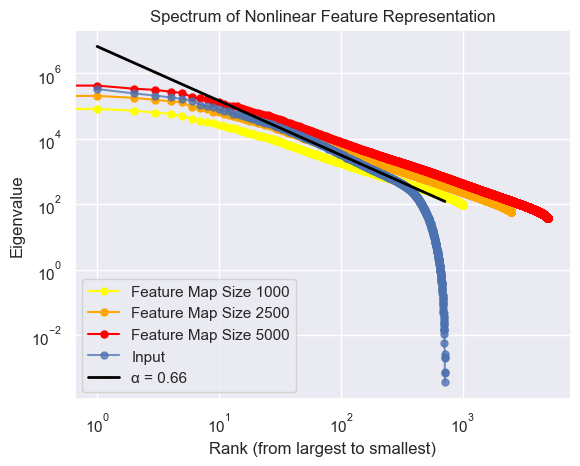

In [32]:
def relu(z):
    return np.maximum(0,z)

for size, color in zip(sizes,colors):
    phi = relu(X_centered @ weight_matrix(size).T)
    cov_matrix_features = np.cov(phi, rowvar = False)
    eigenvalues_features = np.linalg.eigh(cov_matrix_features)[0]
    eigenvalues_features = np.flip(eigenvalues_features)
    filtered_eigenvalues_features = eigenvalues_features[eigenvalues_features > 1e-6]
    plt.loglog(filtered_eigenvalues_features, 'o-', markersize=5, color=color, label=f'Feature Map Size {size}')

plt.loglog(ranks, filtered_eigenvalues, 'o-', markersize=5, label='Input', alpha = 0.75)
plt.loglog(ranks, m * ranks**(-1 - alpha_fit), label=f'α = {alpha_fit:.2f}', color='black', lw=2, alpha=1)

plt.xlabel('Rank (from largest to smallest)')
plt.ylabel('Eigenvalue')
plt.title('Spectrum of Nonlinear Feature Representation')
plt.legend()
plt.show()  

We clearly witness an increase in the portion of the spectrum that's approximately fit by the power law. Hence, by applying a nonlinear transformation to our data we can build additional useful features when we have more samples than input features. We conclude that both the size of the model $N$ and the size of the dataset $T$ control the length of the power law in the spectrum of features. On one hand, when the model is feature limited ($N < T$) we can increase the power-law bulk by increasing the size of the model; on the other hand, when the model is data limited ($T < N$), the feature-feature covariance matrix is rank limited by the size of the dataset, and so the extra capacity is unnecessary as the extent of the power law is similarly limited by $T$.

## A statistical Model

Let's build a generative data model in which the covariance spectrum has the form of a power law.

We want to build a generative data model and random feature model that captures the empirical properties of real datasets composed with nonlinear feature maps such that the resulting statistical model's test loss exhibits the scaling law phenomenology illustrated in the previous section. After finding features with these properties in a simplified model, we can then use them in a generalized linear regression problem such that the test loss exhibits our desired behaviour. Our goal is to compute that averaged test loss analytically. This will be done using tools from random matrix theory.

We will start by defining a generative model for the dataset. Rather than generating data in the raw input space, we will generate data in a latent space. Consider a latent data point, $x$, whose components are denoted $x_I$, with $I = 1,...,M$, where $I$ indexes the $M$ different latent features. To get the right behaviour, we need the dimension of the latent space to be larger than any other scales in the problem : $M \gg N,T$. For each data point, we will sample components from a zero-mean Gaussian distribution with covariance matrix $\Lambda$: $<x_I>=0$, $<x_Ix_J>=\Lambda_{IJ}$.

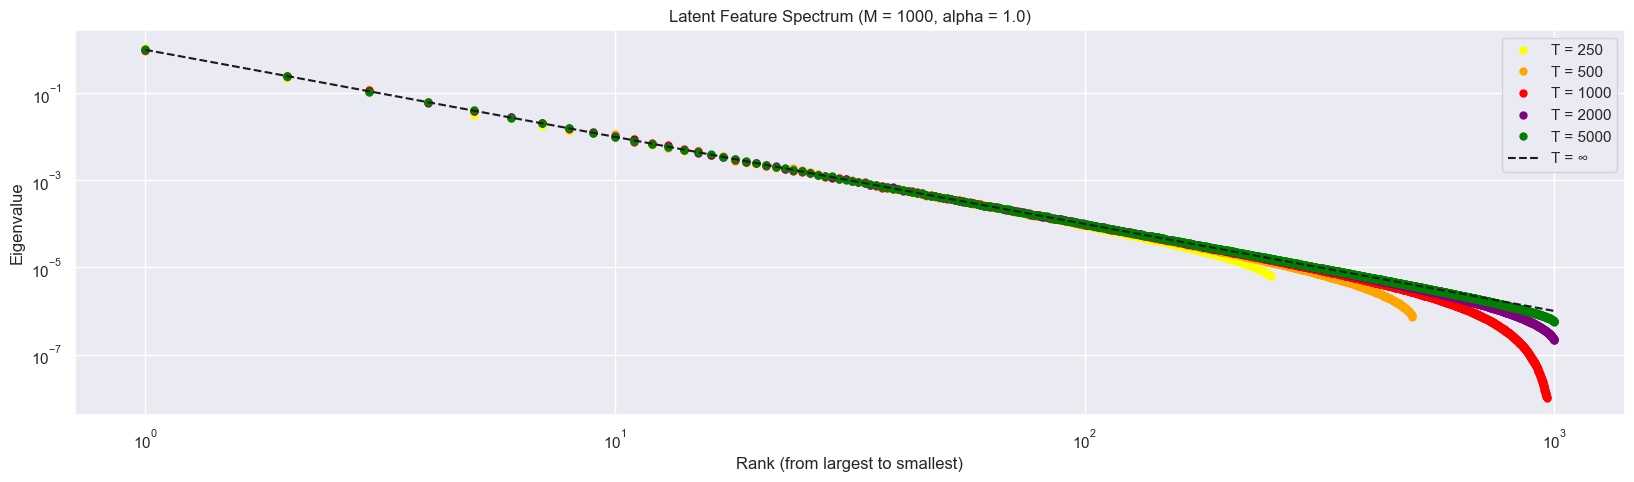

In [30]:
# Number of samples to generate
T_sizes = [250, 500, 1000, 2000, 5000]
# Latent space dimension
M = 1000
# alpha: ultimately the power-law exponent of the test loss
alpha = 1
# Maximal eigenvalue
lambda_max = 1
# Graph colors
colors = ['yellow', 'orange', 'red', 'purple', 'green']

# Define the covariance matrix Lambda
eigenvalues_lambda = np.array([lambda_max / (i+1)**(1+alpha) for i in range(M)])
Lambda = np.diag(eigenvalues_lambda)

# Plot setup
plt.figure(figsize=(20, 5))

for size,color in zip(T_sizes,colors):

    # Generate latent data points z from Gaussian distribution with covariance Lambda
    Z = np.random.multivariate_normal(np.zeros(M), Lambda, size=size)
    # Compute the empirical covariance matrix from Z
    empirical_cov = np.cov(Z, rowvar=False)
    # Compute the eigenvalues of the empirical covariance matrix
    empirical_eigenvalues = np.linalg.eigh(empirical_cov)[0]
    empirical_eigenvalues = np.flip(empirical_eigenvalues)

    # Check for non-positive eigenvalues
    positive_eigenvalues = empirical_eigenvalues[empirical_eigenvalues > 10**(-8)]
    
    # Plot only positive eigenvalues
    plt.loglog(range(1, len(positive_eigenvalues) + 1), positive_eigenvalues, 'o', markersize=5, color=color, label=f'T = {size}')
    
plt.loglog(range(1, len(eigenvalues_lambda) + 1), eigenvalues_lambda, 'k--', label='T = ∞')
plt.xlabel('Rank (from largest to smallest)')
plt.ylabel('Eigenvalue')
plt.title('Latent Feature Spectrum (M = 1000, alpha = 1.0)')
plt.legend()
plt.show()  

We notice that for $T < M$ the extent of the power law increases with the size of the dataset, and for $T \geq M$ increasing the size of the dataset sharpens the rapid decline towards zero but leaves the extent of the power law fixed.

Let us now repeat the process, but this time we will keep $T$ and $M$ fixed, and vary $\alpha$

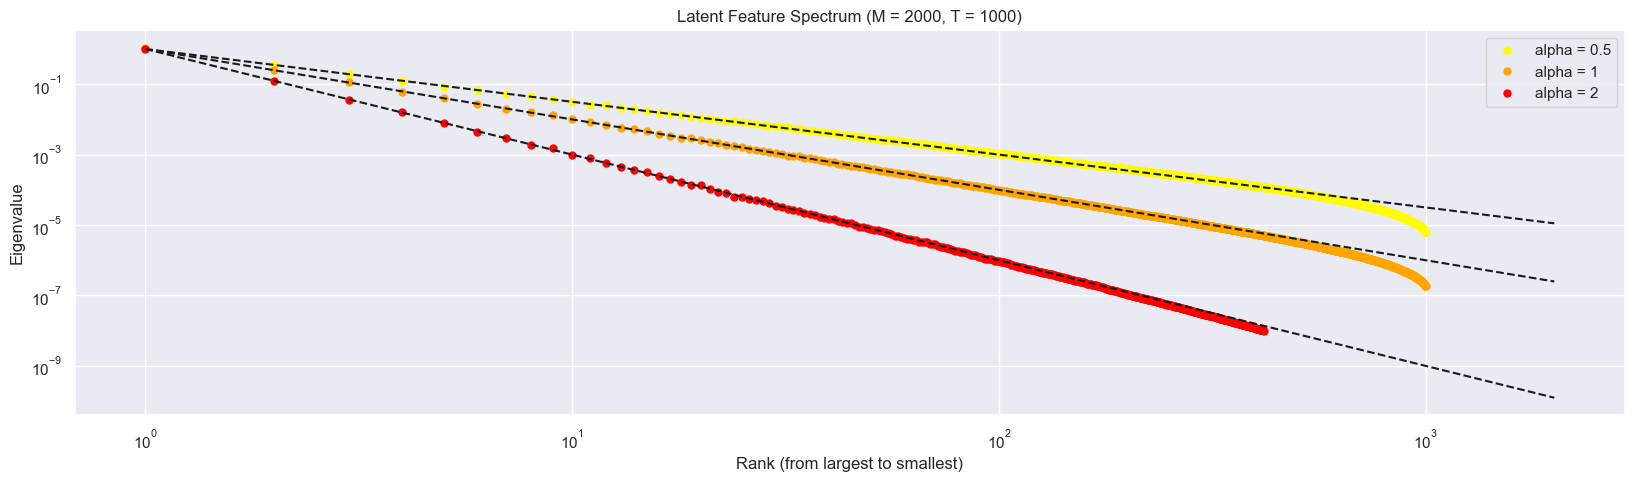

In [33]:
# Number of samples to generate
alpha_sizes = [0.5, 1, 2]
# Latent space dimension
M = 2000
# T
T = 1000
# Maximal eigenvalue
lambda_max = 1
# Graph colors
colors = ['yellow', 'orange', 'red', 'purple']

# Plot setup
plt.figure(figsize=(20, 5))

for alpha,color in zip(alpha_sizes,colors):

    # Define the covariance matrix Lambda
    eigenvalues_lambda = np.array([lambda_max / (i+1)**(1+alpha) for i in range(M)])
    Lambda = np.diag(eigenvalues_lambda)

    # Generate latent data points z from Gaussian distribution with covariance Lambda
    Z = np.random.multivariate_normal(np.zeros(M), Lambda, size=T)
    # Compute the empirical covariance matrix from Z
    empirical_cov = np.cov(Z, rowvar=False)
    # Compute the eigenvalues of the empirical covariance matrix
    empirical_eigenvalues = np.linalg.eigh(empirical_cov)[0]
    empirical_eigenvalues = np.flip(empirical_eigenvalues)

    # Check for non-positive eigenvalues
    positive_eigenvalues = empirical_eigenvalues[empirical_eigenvalues > 10**(-8)]
    
    # Plot only positive eigenvalues
    plt.loglog(range(1, len(positive_eigenvalues) + 1), positive_eigenvalues, 'o', markersize=5, color=color, label=f'alpha = {alpha}')
    plt.loglog(range(1, len(eigenvalues_lambda) + 1), eigenvalues_lambda, 'k--')
    
plt.xlabel('Rank (from largest to smallest)')
plt.ylabel('Eigenvalue')
plt.title('Latent Feature Spectrum (M = 2000, T = 1000)')
plt.legend()
plt.show()  

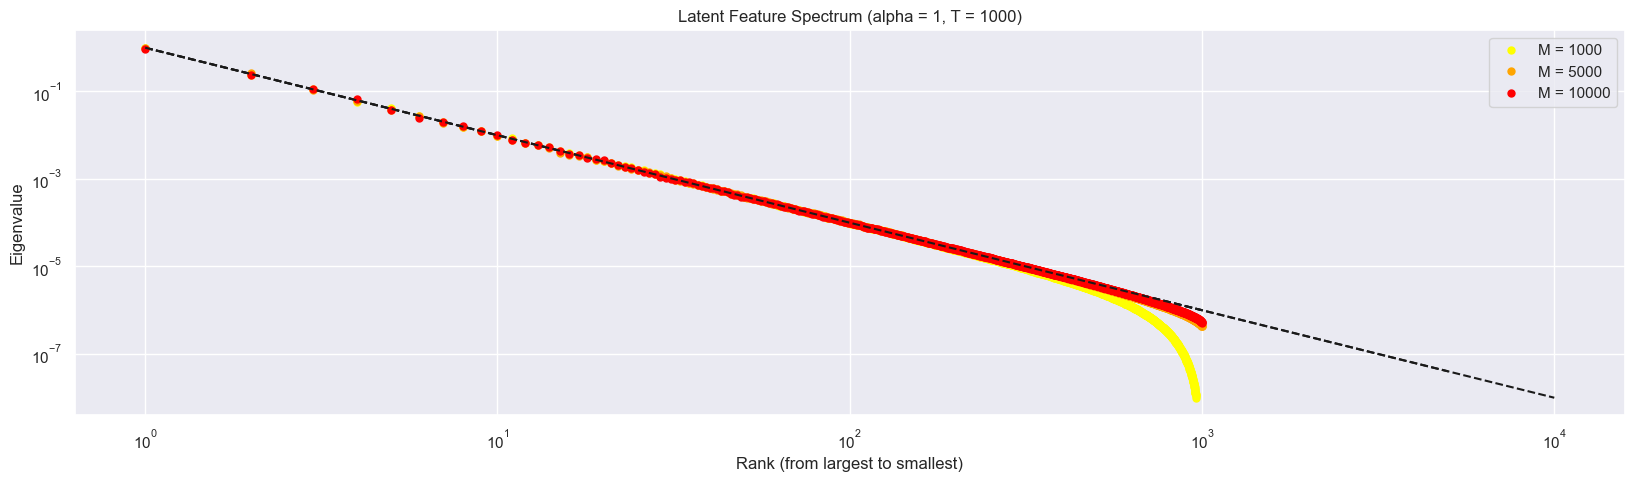

In [35]:
# Latent space dimensions
M_list = [1000, 5000, 10000]
# Alpha
alpha = 1
# T
T = 1000
# Maximal eigenvalue
lambda_max = 1
# Graph colors
colors = ['yellow', 'orange', 'red']

# Plot setup
plt.figure(figsize=(20, 5))

for M,color in zip(M_list,colors):

    # Define the covariance matrix Lambda
    eigenvalues_lambda = np.array([lambda_max / (i+1)**(1+alpha) for i in range(M)])
    Lambda = np.diag(eigenvalues_lambda)

    # Generate latent data points z from Gaussian distribution with covariance Lambda
    Z = np.random.multivariate_normal(np.zeros(M), Lambda, size=T)
    # Compute the empirical covariance matrix from Z
    empirical_cov = np.cov(Z, rowvar=False)
    # Compute the eigenvalues of the empirical covariance matrix
    empirical_eigenvalues = np.linalg.eigh(empirical_cov)[0]
    empirical_eigenvalues = np.flip(empirical_eigenvalues)

    # Check for non-positive eigenvalues
    positive_eigenvalues = empirical_eigenvalues[empirical_eigenvalues > 10**(-8)]
    
    # Plot only positive eigenvalues
    plt.loglog(range(1, len(positive_eigenvalues) + 1), positive_eigenvalues, 'o', markersize=5, color=color, label=f'M = {M}')
    plt.loglog(range(1, len(eigenvalues_lambda) + 1), eigenvalues_lambda, 'k--')
    
plt.xlabel('Rank (from largest to smallest)')
plt.ylabel('Eigenvalue')
plt.title('Latent Feature Spectrum (alpha = 1, T = 1000)')
plt.legend()
plt.show()  

Finally, for every latent datapoint $x_I$, we will also generate a C-dimensional label: $y_i = \sum_{I=1}^Mw_{iI}x_I$, with $i = 1,...,C$, using a $C$-by-$M$-dimensional weight matrix $w=w_{iI}$, whose elements will take to be independent and drawn from a zero-mean Gaussian distribution, so that:
$<w_{iI}> = 0$, $<w_{i_1I_1}w_{i_2I_2}>=\frac{\sigma_w^2}{M}\delta_{i_1i_2}\delta_{I_1I_2}$.

In [36]:
M = 5000
C = 10
T = 4000
sigma_squared = 0.2
alpha = 1

eigenvalues_lambda = np.array([lambda_max / (i+1)**(1+alpha) for i in range(M)])
Lambda = np.diag(eigenvalues_lambda)

Z = np.random.multivariate_normal(np.zeros(M), Lambda, size=T)
U = np.random.normal(0, np.sqrt(sigma_squared/M), size=(C, M))

Y = np.dot(Z, U.T)

### Random Feature Model

Now, let's define a random feature model that we will use to map our latent data to a feature representation. We want to find a representation where the spectrum contains an approximate power-law fit that is controlled by the number of feature functions, $N$, in the model. We will define our collection of feature functions by: $\phi_j = \sum_{I=1}^{M} w_{jI}x_I$, with $j = 1,...,N$, and $w = w_{jI}$ is a $N\times M$ matrix of random feature weights drawn from a zero-mean Gaussian distribution, so that $<w_{jI}>=0$, $<w_{j_1I_1}w_{j_2I_2}>=\frac{\sigma_w^2}{M}\delta_{j_1j_2}\delta_{I_1I_2}$.

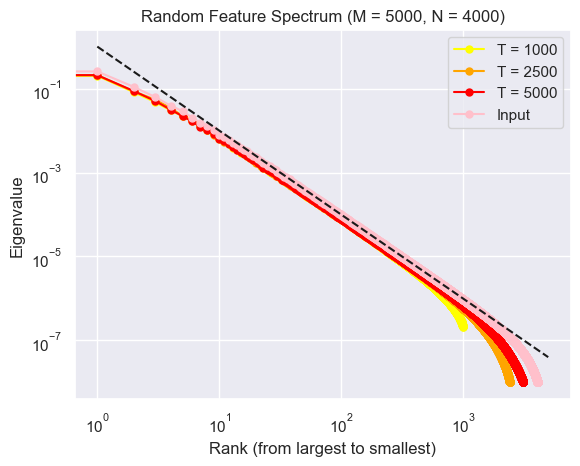

In [42]:
# Sample size
T_sizes = [1000, 2500, 5000]
# Latent space dimension
M = 5000
# number of feature functions
N = 4000
# alpha
alpha = 1
# Maximal eigenvalue
lambda_max = 1
# Graph colors
colors = ['yellow', 'orange', 'red']


# Build the weight matrix
def weight_matrix(N):
    W = np.random.normal(0,1/np.sqrt(M), size = (N,M))
    return(W)

# Plot the weight matrices' spectra
for size, color in zip(T_sizes,colors):
    # Generate latent data points z from Gaussian distribution with covariance Lambda
    Z = np.random.multivariate_normal(np.zeros(M), Lambda, size=size)
    phi = Z @ weight_matrix(N).T
    cov_matrix_features = np.cov(phi, rowvar = False)
    eigenvalues_features = np.linalg.eigh(cov_matrix_features)[0]
    eigenvalues_features = np.flip(eigenvalues_features)
    eigenvalues_features = eigenvalues_features[eigenvalues_features > 10**(-8)]
    plt.loglog(eigenvalues_features, 'o-', markersize=5, color=color, label=f'T = {size}')


cov_matrix = np.cov(Z, rowvar = False)
eigs = np.linalg.eigh(cov_matrix)[0]
eigs = np.flip(eigs)
eigs = eigs[eigs > 10**(-8)]
plt.loglog(eigs, 'o-', markersize=5, color = 'pink', label='Input', alpha = 1)
eigenvalues_lambda = np.array([lambda_max / (i+1)**(1+alpha) for i in range(M)])
eigenvalues_lambda = eigenvalues_lambda[eigenvalues_lambda > 10**(-8)]
plt.loglog(range(1, len(eigenvalues_lambda) + 1), eigenvalues_lambda, 'k--')

plt.xlabel('Rank (from largest to smallest)')
plt.ylabel('Eigenvalue')
plt.title('Random Feature Spectrum (M = 5000, N = 4000)')
plt.legend()
plt.show()  

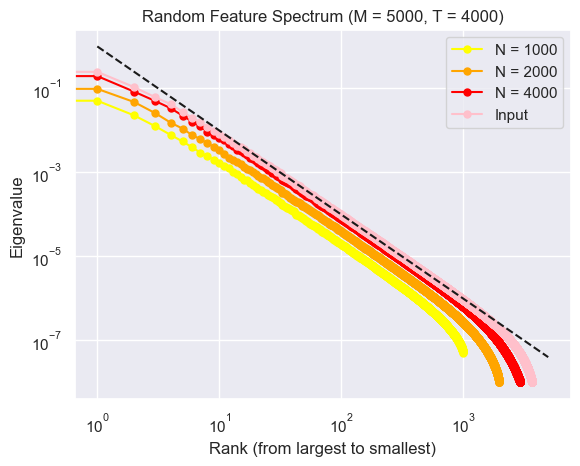

In [43]:
# Sample size
T = 4000
# Latent space dimension
M = 5000
# Try different feature input dimensions
N_sizes = [1000, 2000, 4000]
# alpha
alpha = 1
# Maximal eigenvalue
lambda_max = 1
# Graph colors
colors = ['yellow', 'orange', 'red']


# Build the weight matrix
def weight_matrix(N):
    W = np.random.normal(0,1/np.sqrt(M), size = (N,M))
    return(W)

# Plot the weight matrices' spectra
for size, color in zip(N_sizes,colors):
    # Generate latent data points z from Gaussian distribution with covariance Lambda
    Z = np.random.multivariate_normal(np.zeros(M), Lambda, size=T)
    phi = Z @ weight_matrix(size).T
    cov_matrix_features = np.cov(phi, rowvar = False)
    eigenvalues_features = np.linalg.eigh(cov_matrix_features)[0]
    eigenvalues_features = np.flip(eigenvalues_features)
    eigenvalues_features = eigenvalues_features[eigenvalues_features > 10**(-8)]
    plt.loglog(eigenvalues_features, 'o-', markersize=5, color=color, label=f'N = {size}')


cov_matrix = np.cov(Z, rowvar = False)
eigs = np.linalg.eigh(cov_matrix)[0]
eigs = np.flip(eigs)
eigs = eigs[eigs > 10**(-8)]
plt.loglog(eigs, 'o-', markersize=5, color = 'pink', label='Input', alpha = 1)
eigenvalues_lambda = np.array([lambda_max / (i+1)**(1+alpha) for i in range(M)])
eigenvalues_lambda = eigenvalues_lambda[eigenvalues_lambda > 10**(-8)]
plt.loglog(range(1, len(eigenvalues_lambda) + 1), eigenvalues_lambda, 'k--')

plt.xlabel('Rank (from largest to smallest)')
plt.ylabel('Eigenvalue')
plt.title('Random Feature Spectrum (M = 5000, T = 4000)')
plt.legend()
plt.show()  

In [3]:
# Sample size
T = 4000
# Latent space dimension
N = 4000
# Try different feature input dimensions
M_sizes = [4000, 8000, 15000]
# alpha
alpha = 1
# Maximal eigenvalue
lambda_max = 1
# Graph colors
colors = ['yellow', 'orange', 'red']


# Build the weight matrix
def weight_matrix(N,M):
    W = np.random.normal(0,1/np.sqrt(M), size = (N,M))
    return(W)

# Plot the weight matrices' spectra
for M, color in zip(M_sizes,colors):
    # Generate latent data points z from Gaussian distribution with covariance Lambda
    eigenvalues_lambda = np.array([lambda_max / (i+1)**(1+alpha) for i in range(M)])
    Lambda = np.diag(eigenvalues_lambda)
    Z = np.random.multivariate_normal(np.zeros(M), Lambda, size=T)
    phi = Z @ weight_matrix(N,M).T
    cov_matrix_features = np.cov(phi, rowvar = False)
    eigenvalues_features = np.linalg.eigh(cov_matrix_features)[0]
    eigenvalues_features = np.flip(eigenvalues_features)
    eigenvalues_features = eigenvalues_features[eigenvalues_features > 10**(-8)]
    plt.loglog(eigenvalues_features, 'o-', markersize=5, color=color, label=f'M = {M}')


cov_matrix = np.cov(Z, rowvar = False)
eigs = np.linalg.eigh(cov_matrix)[0]
eigs = np.flip(eigs)
eigs = eigs[eigs > 10**(-8)]
plt.loglog(eigs, 'o-', markersize=5, color = 'pink', label='Input', alpha = 1)
eigenvalues_lambda = np.array([lambda_max / (i+1)**(1+alpha) for i in range(M)])
eigenvalues_lambda = eigenvalues_lambda[eigenvalues_lambda > 10**(-8)]
plt.loglog(range(1, len(eigenvalues_lambda) + 1), eigenvalues_lambda, 'k--')

plt.xlabel('Rank (from largest to smallest)')
plt.ylabel('Eigenvalue')
plt.title('Random Feature Spectrum (N = 4000, T = 4000)')
plt.legend()
plt.show()  

In both graphs, we see that the power-law portion of each spectrum is controlled by the minimum of the number of features, $N$, and the size of the dataset, $T$.

## Generalized Linear Regression

Now that we constructed our features, we will "train" a linear model to reproduce the labels, $y_i$, generated from the underlying latent features, by learning a linear transformation of the random features $\phi_j(x)$: \
$z_i(x;\theta)=\sum_{j=1}^N\theta_{ij}\phi_j(x)$, where $\theta = \theta_{ij}$ is a set of learnable parameters.

We want to plot the test loss for a variety of model sizes, $N$, as a function of the training set sive, $T$: first, we generate latent training and test sets by sampling from our generative data model; then, we map both sets through random feature models of different sizes; next, we use a linear regressio model to compute test-set predictions for different values of the ridge parameter $\gamma$, and evaluate the test loss as a function of $\gamma$; finally, we optimize the ridge parameter $(\gamma = \gamma^*)$ and plot the test loss that gives the best performance.

In [64]:
def generate_latentdata(lambdamax, alpha, M,T):    # generate x
    eigenvalues = np.array([lambdamax / (i+1)**(1+alpha) for i in range(M)])
    covariance_matrix = np.diag(eigenvalues)
    return np.random.multivariate_normal(np.zeros(M), covariance_matrix, size=int(T))

def generate_w(C,M):    # generate w
    return np.random.normal(0, 1/np.sqrt(M), (C,M))

def generate_label(x,w):    # generate y
    return np.dot(w,x.T)    

def generate_u(N,M):    # generate u
    return generate_w(N,M)

def generate_featurefunctions(u,x):    # generate phi
    return np.dot(u, x.T)

def generate_predictions(phi,theta):    # generate z
    return np.dot(theta, phi)

def generate_trainset(x, y):
    return (x,y)

def generate_epsilon(C, T):    # generate epsilon
    return np.random.normal(loc=0, scale=1, size = (C,int(T)))

def loss_function(theta, phi, y, epsilon, gamma):
    # Calculate the prediction error
    error = np.dot(phi, theta.T) - y - epsilon
    # Calculate the mean squared error part
    mse_loss = 0.5 * np.sum(error ** 2)
    # Calculate the regularization part
    regularization_loss = 0.5 * gamma * np.sum(theta ** 2)
    # Sum up the MSE loss and the regularization term
    total_loss = mse_loss + regularization_loss
    return total_loss

def optimal_theta(y,epsilon,phi,q):    #generate theta*
    return np.dot(np.dot(y + epsilon, phi.T), q)

def generate_q(gamma, phi, N):    # generate q
    return np.linalg.inv(gamma*np.identity(N)+np.dot(phi,phi.T))

def generate_zetahat(theta,phi):    # generate z^
    return np.dot(theta, phi)

def compute_testloss(T, w, x, epsilon, phi, q, phihat, xhat):
    term1 = (np.dot(w, x.T) + epsilon) @ phi.T @ q @ phihat
    term2 = np.dot(w, xhat.T)
    return (1/(2*int(T))) * np.linalg.norm((term1-term2), 'fro')**2

def complex_curve(x, a, b, c, d):
    return a * x**(b * np.log(c * x + 1)) + d

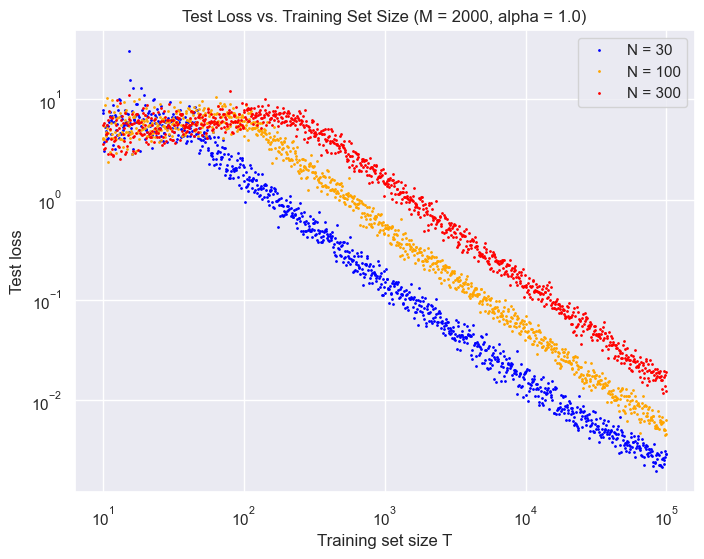

In [ ]:

# Latent space dimension
M = 400
# alpha
alpha = 1
# Try different feature input dimensions
N_sizes = [30, 100, 300]
# Maximal eigenvalue
lambda_max = 1
# Graph colors
colors = ['blue', 'orange', 'red']
C=10
T_t = 10

plt.figure(figsize=(8, 6))

# Plot the weight matrices' spectra
for N, color in zip(N_sizes,colors):
    losses = []  # Collect losses for different T
    T_values = np.logspace(start=1, stop=6, num=1000)  # Increase the num parameter
  # Log-spaced range for T values
    for T in T_values:
        x = generate_latentdata(lambda_max, alpha, M,T)
        w = generate_w(C,M)  # Assuming generate_w(C,M)
        u = generate_u(N,M)
        phi = generate_featurefunctions(u,x)
        epsilon = generate_epsilon(C, T)  # Assuming generate_epsilon(C,T)
        q = generate_q(0.001, phi, N)  # Assuming generate_q(gamma,phi,N)
        xhat = generate_latentdata(lambda_max, alpha, M,T_t)
        phihat = generate_featurefunctions(u,xhat)  # Assuming w is used for phihat
        loss = compute_testloss(T_t, w, x, epsilon, phi, q, phihat, xhat)
        losses.append(loss)
    plt.loglog(T_values, losses, 'o', color=color, markersize=1, label=f'N = {N}')

# Finalize and show the plot
plt.xlabel('Training set size T')
plt.ylabel('Test loss')
plt.title('Test Loss vs. Training Set Size (M = 2000, alpha = 1.0)')
plt.legend()
plt.show()

## Nonlinear model

We will repeat the previous steps, this time implementing nonlinearity in our system. The model we will adopt to predict the lables of our data will be a neural network, which is capable of efficiently capture nonlinear functions.

In [66]:
# Latent space dimension
M = 100
# alpha
alpha=1
# Try different feature input dimensions
N = 500
# Maximal eigenvalue
lambda_max = 1
# Graph colors
C=10
T = 1000

def generate_latentdata(lambdamax, alpha, M,T):    # generate x
    eigenvalues = np.array([lambdamax / (i+1)**(1+alpha) for i in range(M)])
    covariance_matrix = np.diag(eigenvalues)
    return np.random.multivariate_normal(np.zeros(M), covariance_matrix, size=int(T))

def relu(z):
    return np.maximum(0,z)

def generate_label(x,w):    # generate y
    return relu(np.dot(w,x.T))

def generate_relufeaturefunctions(u,x):    # generate phi
    return relu(np.dot(u, x.T))

def generate_w(C,M):    # generate w
    return np.random.normal(0, 1/np.sqrt(M), (C,M))

w = generate_w(C,M)

xpred = generate_latentdata(lambda_max, alpha, M,T)
xtest = generate_latentdata(lambda_max, alpha, M,T)

y_pred = generate_label(xpred,w)
y_test = generate_label(xtest,w)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def train_and_evaluate(x_train, y_train, x_test, y_test, N):
    model = Sequential([
        Dense(128, activation='relu', input_dim=N),
        Dense(64, activation='relu'),
        Dense(C)  # Output layer: predicting C outputs
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=10, verbose=0)
    loss = model.evaluate(x_test, y_test, verbose=0)
    return loss



In [68]:
N_values = [300, 500, 1000] 
results = {}
colors = ['blue', 'orange', 'red']
M = 100

alpha = 1

lambda_max = 1
C=10


for N in N_values:
    losses = []
    T_values = np.logspace(start=1, stop=5, num=1000)
    for T in T_values:
        # Generate data
        x = generate_latentdata(lambda_max, alpha, N, T)
        w = generate_w(C, N)
        y = generate_label(x, w)
        
        split_index = int(0.8 * T)
        x_train, x_test = x[:split_index], x[split_index:]
        y_train, y_test = y[:, :split_index].T, y[:, split_index:].T
        
        # Train and evaluate the model
        loss = train_and_evaluate(x_train, y_train, x_test, y_test, N)
        losses.append(loss)
    print(N)
    
    results[N] = losses

# Plotting
for N, losses in results.items():
    plt.plot(T_values, losses, 'o', markersize=1, label=f'N={N}')


KeyboardInterrupt: 

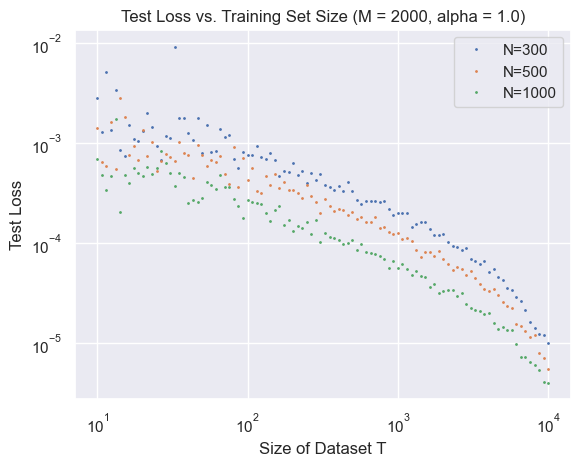

In [ ]:
from scipy.optimize import curve_fit

for N, losses in results.items():
    plt.plot(T_values, losses, 'o', markersize=1, label=f'N={N}')
    plt.xscale('log')
    plt.yscale('log')

# Adding labels and title, if not already present
plt.xlabel('Size of Dataset T')
plt.ylabel('Test Loss')
plt.title('Test Loss vs. Training Set Size (M = 2000, alpha = 1.0)')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
N_values = 200
results2 = {}
colors = ['blue', 'orange', 'red']
M = 100

alpha_values = [0.5, 1, 2]

lambda_max = 1
C=10


for alpha in alpha_values:
    losses2 = []
    T_values = np.logspace(start=1, stop=5, num=1000)
    for T in T_values:
        # Generate data
        x = generate_latentdata(lambda_max, alpha, N, T)
        w = generate_w(C, N)
        y = generate_label(x, w)
        
        # Split data (simplistic split, consider using sklearn's train_test_split for random splits)
        split_index = int(0.8 * T)
        x_train, x_test = x[:split_index], x[split_index:]
        y_train, y_test = y[:, :split_index].T, y[:, split_index:].T
        
        # Train and evaluate the model
        loss = train_and_evaluate(x_train, y_train, x_test, y_test, N)
        losses2.append(loss)
    print(alpha)
    
    results2[alpha] = losses2

0.5
1
2


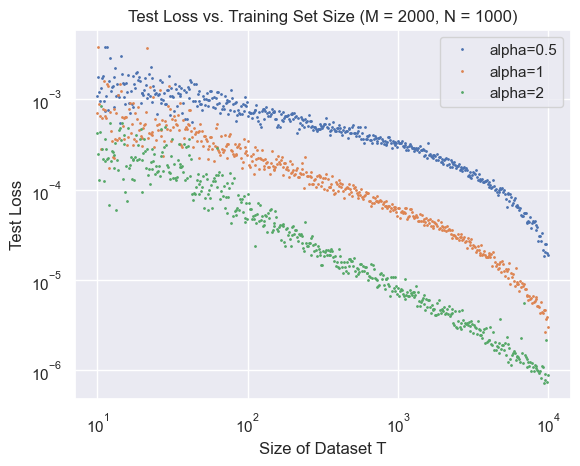

In [ ]:
# Plotting
for alpha, losses2 in results2.items():
    plt.plot(T_values, losses2, 'o', markersize=1, label=f'alpha={alpha}')
    plt.xscale('log')
    plt.yscale('log')

plt.xlabel('Size of Dataset T')
plt.ylabel('Test Loss')
plt.title('Test Loss vs. Training Set Size (M = 2000, N = 1000)')

# Set the limits for the x-axis



# Show the legend
plt.legend()

# Display the plot
plt.show()

## Conclusion

My research results have confirmed most of the conclusions drawn in the papers I referenced. The plots regarding the test loss of my models, however, differed slightly from the bibliography. Indeed, while the curves can be accurately approximated to exponential functions, as wanted, they do not end in a plateau. There are different reasons why this might have occurred:
* In the linear scenario, due to my limited computation power, I could not assess a deep minimization problem for computing the optimal ridge parameter $\gamma$. Instead, I selected $\gamma$ from a small set of possible values it could have taken. As a result, the model's test loss was less likely to reach a stable value.
* For the same reason, in the nonlinear case, the tuning of my hyperparameters was strongly limited. 